In [2]:
import pandas as pd
from pandas import DataFrame

try:
# Carica il tuo file XLSX
    xlsx_file = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/dataset/richerDataset.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
# except Exception as e:
    print(f"Si è verificato un errore: {e}")                                                          
    
# Rimuovi il record con k_m2 uguale a 0
df = df[df['k_m2'] != 0]
#Rimuovi colonne Porosity tot e SSA tot
df = df.drop(['Porosity_Tot', 'SSA_Tot', 'Ech'], axis=1)
# Resetta gli indici del DataFrame
df.reset_index(drop=True, inplace=True)



k2_max = df['k_m2'].max()
k2_min = df['k_m2'].min()
print(df)



    Conn.Dens.  Porosity     SSA  Tortuosity          k_m2
0      310.913     0.137   5.065      2.0340  1.473350e-12
1      310.913     0.147   5.253      2.6650  2.254724e-12
2      310.913     0.131   4.697      2.1090  9.543177e-12
3      350.137     0.115   5.583      4.1830  9.664920e-13
4      350.137     0.139   7.447      2.5950  9.180783e-13
5      350.137     0.115   5.311      4.1010  1.435774e-12
6      368.141     0.134   6.990      2.7740  4.010302e-13
7      368.141     0.138   7.132      2.7790  3.937021e-12
8      368.141     0.116   5.290      3.8680  1.933907e-12
9       10.573     0.020   0.791      3.1000  3.021802e-13
10      10.573     0.020   0.806      2.9000  3.190436e-13
11     458.436     0.273   7.721      1.7170  5.516051e-11
12     458.436     0.250   6.870      1.3530  3.822390e-11
13     458.436     0.265   7.560      1.5730  5.275967e-11
14     607.796     0.250   7.353      1.3400  2.009570e-11
15     607.796     0.281   8.363      1.3720  1.319490e-

In [3]:
# Log-Trasformo la colonna k_m2 in base 10
import numpy as np
df['k_m2'] = np.log10(df['k_m2'])
print(df)

    Conn.Dens.  Porosity     SSA  Tortuosity       k_m2
0      310.913     0.137   5.065      2.0340 -11.831694
1      310.913     0.147   5.253      2.6650 -11.646907
2      310.913     0.131   4.697      2.1090 -11.020307
3      350.137     0.115   5.583      4.1830 -12.014802
4      350.137     0.139   7.447      2.5950 -12.037120
5      350.137     0.115   5.311      4.1010 -11.842914
6      368.141     0.134   6.990      2.7740 -12.396823
7      368.141     0.138   7.132      2.7790 -11.404832
8      368.141     0.116   5.290      3.8680 -11.713564
9       10.573     0.020   0.791      3.1000 -12.519734
10      10.573     0.020   0.806      2.9000 -12.496150
11     458.436     0.273   7.721      1.7170 -10.258372
12     458.436     0.250   6.870      1.3530 -10.417665
13     458.436     0.265   7.560      1.5730 -10.277698
14     607.796     0.250   7.353      1.3400 -10.696897
15     607.796     0.281   8.363      1.3720  -9.879594
16     607.796     0.297   9.123      1.6750 -10

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)
# Crea un nuovo DataFrame con i dati scalati e riassegna le colonne non scalate
#df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Stampa il DataFrame scalato
print("DataFrame scalato:")
print(df_scaled)

DataFrame scalato:
    Conn.Dens.  Porosity       SSA  Tortuosity      k_m2
0     0.502894  0.422383  0.449469    0.222507  0.476669
1     0.502894  0.458484  0.469240    0.424816  0.526208
2     0.502894  0.400722  0.410769    0.246553  0.694191
3     0.568572  0.342960  0.503944    0.911510  0.427581
4     0.568572  0.429603  0.699968    0.402373  0.421597
5     0.568572  0.342960  0.475339    0.885220  0.473661
6     0.598718  0.411552  0.651909    0.459763  0.325166
7     0.598718  0.425993  0.666842    0.461366  0.591105
8     0.598718  0.346570  0.473131    0.810516  0.508338
9     0.000000  0.000000  0.000000    0.564283  0.292215
10    0.000000  0.000000  0.001577    0.500160  0.298538
11    0.749909  0.913357  0.728783    0.120872  0.898455
12    0.749909  0.830325  0.639289    0.004168  0.855751
13    0.749909  0.884477  0.711852    0.074703  0.893274
14    1.000000  0.830325  0.690083    0.000000  0.780892
15    1.000000  0.942238  0.796298    0.010260  1.000000
16    1.0000

Questa cella serve a trovare il miglior random_state per il test_train_split

Best random_state for train_test_split: 28 with R^2 score: 0.9214762376080752


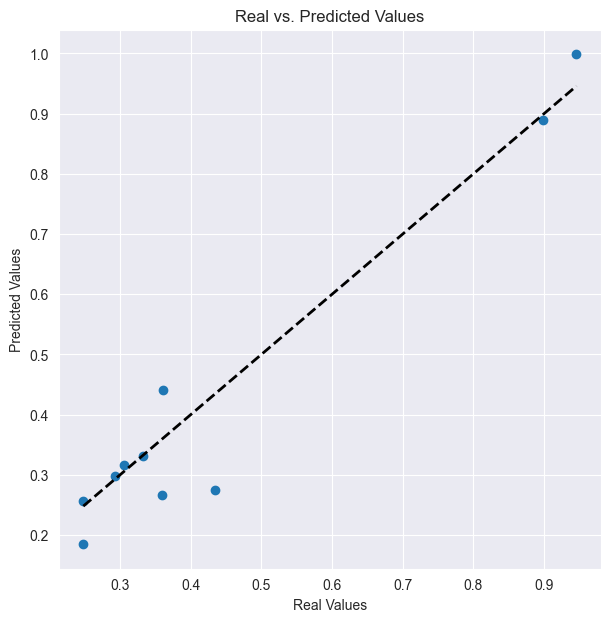

In [5]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


best_y_pred = None
best_y_test = None
best_random_state_split = None
best_score_split = -float('inf')

for random_state in range(0, 100):
    X = df_scaled.drop('k_m2', axis=1)
    y = df_scaled['k_m2']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = XGBRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    if score > best_score_split:
        best_score_split = score
        best_random_state_split = random_state
        best_y_pred = y_pred
        best_y_test = y_test

print(f"Best random_state for train_test_split: {best_random_state_split} with R^2 score: {best_score_split}")

plt.figure(figsize=(7, 7))
plt.scatter(best_y_test, best_y_pred)
plt.plot([best_y_test.min(), best_y_test.max()], [best_y_test.min(), best_y_test.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()

Questa cella serve a trovare il miglior random_state per il modello XGBoost, ma ci rendiamo conto che non è necessario, poichè il random_state una volta fissato per il train_test_split, non influisce sul xgboost

In [ ]:
best_random_state_estimator = None
best_score_estimator = -float('inf')

for random_state in range(0, 100):
    X = df_scaled.drop('k_m2', axis=1)
    y = df_scaled['k_m2']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state_split)
    
    model = XGBRegressor(random_state=random_state)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    if score > best_score_estimator:
        best_score_estimator = score
        best_random_state_estimator = random_state
    
    print(f"Random state: {random_state} - R^2 score: {score}")

print(f"Best random_state for XGBoost: {best_random_state_estimator} with R^2 score: {best_score_estimator}")


In [6]:
#TODO: Qui abbiamo una riduzione del valore R^2 rispetto all'allenamento primario. So però che con uno splitting = 0.1 il valore di R^2 è più alto. Devo aumentare la complessità delle combinazioni degli iperparametri, oltre che i parametri stessi da testare.

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import logging
from tqdm.notebook import tqdm
import joblib


param_grid = {
    'n_estimators': [100, 150, 200, 275],
    'learning_rate': [0.01, 0.1, 0.15, 0.3],
    'max_depth': [3, 5, 9, 15],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.1, 0.2]
}

X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state_split)

model = XGBRegressor(random_state=best_random_state_split)



# Integra tqdm con joblib per mostrare la progress bar
tqdm_callback = lambda iterable: tqdm(
    iterable, 
    total=len(param_grid['n_estimators']) * len(param_grid['learning_rate']) * len(param_grid['max_depth']) * len(param_grid['subsample']) * len(param_grid['colsample_bytree']), 
    desc="Hyperparameter tuning"
)

# Usa joblib per patchare il parallel computing di scikit-learn
with joblib.parallel_backend('loky', inner_max_num_threads=1):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"R^2 score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")


Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Best parameters found: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
R^2 score: 0.8412622176590102
MSE: 0.00959156684962827
MAE: 0.08194601758554235


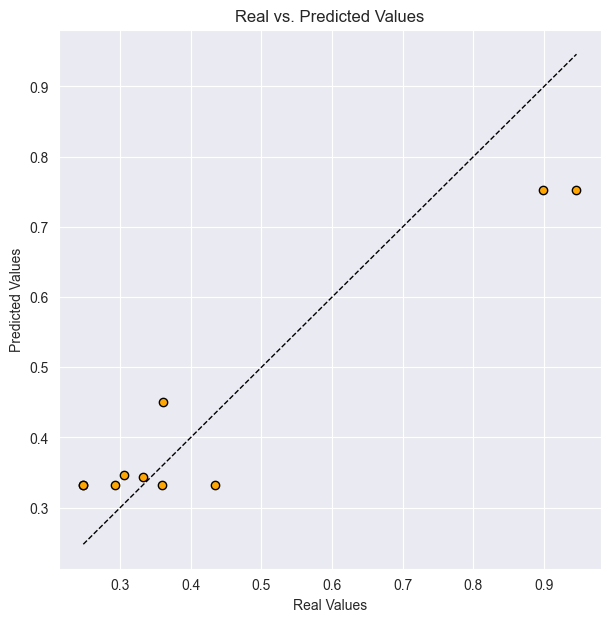

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, color='orange', alpha=0.99, edgecolors='black') 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.grid(True)
plt.show()

In [8]:
# Crea un DataFrame con i valori reali e predetti
results_df = pd.DataFrame({
    'Valori Reali': y_test,
    'Valori Predetti': y_pred
})

# Stampa il DataFrame
print("\nValori Reali vs Valori Predetti:\n")
print(results_df)


Valori Reali vs Valori Predetti:

    Valori Reali  Valori Predetti
18      0.247994         0.331746
25      0.360449         0.450858
16      0.945880         0.751797
20      0.247994         0.331746
9       0.292215         0.331746
17      0.305634         0.346250
11      0.898455         0.751797
27      0.332076         0.343225
42      0.434005         0.331746
43      0.358997         0.331746
